### Install dependenies

In [1]:
import os
import sys
root = os.path.split(os.getcwd())[0]
if root not in sys.path:
    sys.path.append(root)
!{sys.executable} -m pip install numpy pandas intervaltree matplotlib

import numpy as np
import pandas as pd

You should consider upgrading via the '/Users/alex/dev/mellow-strategy-sdk/.venv/bin/python3.9 -m pip install --upgrade pip' command.


### Prepare data

Done


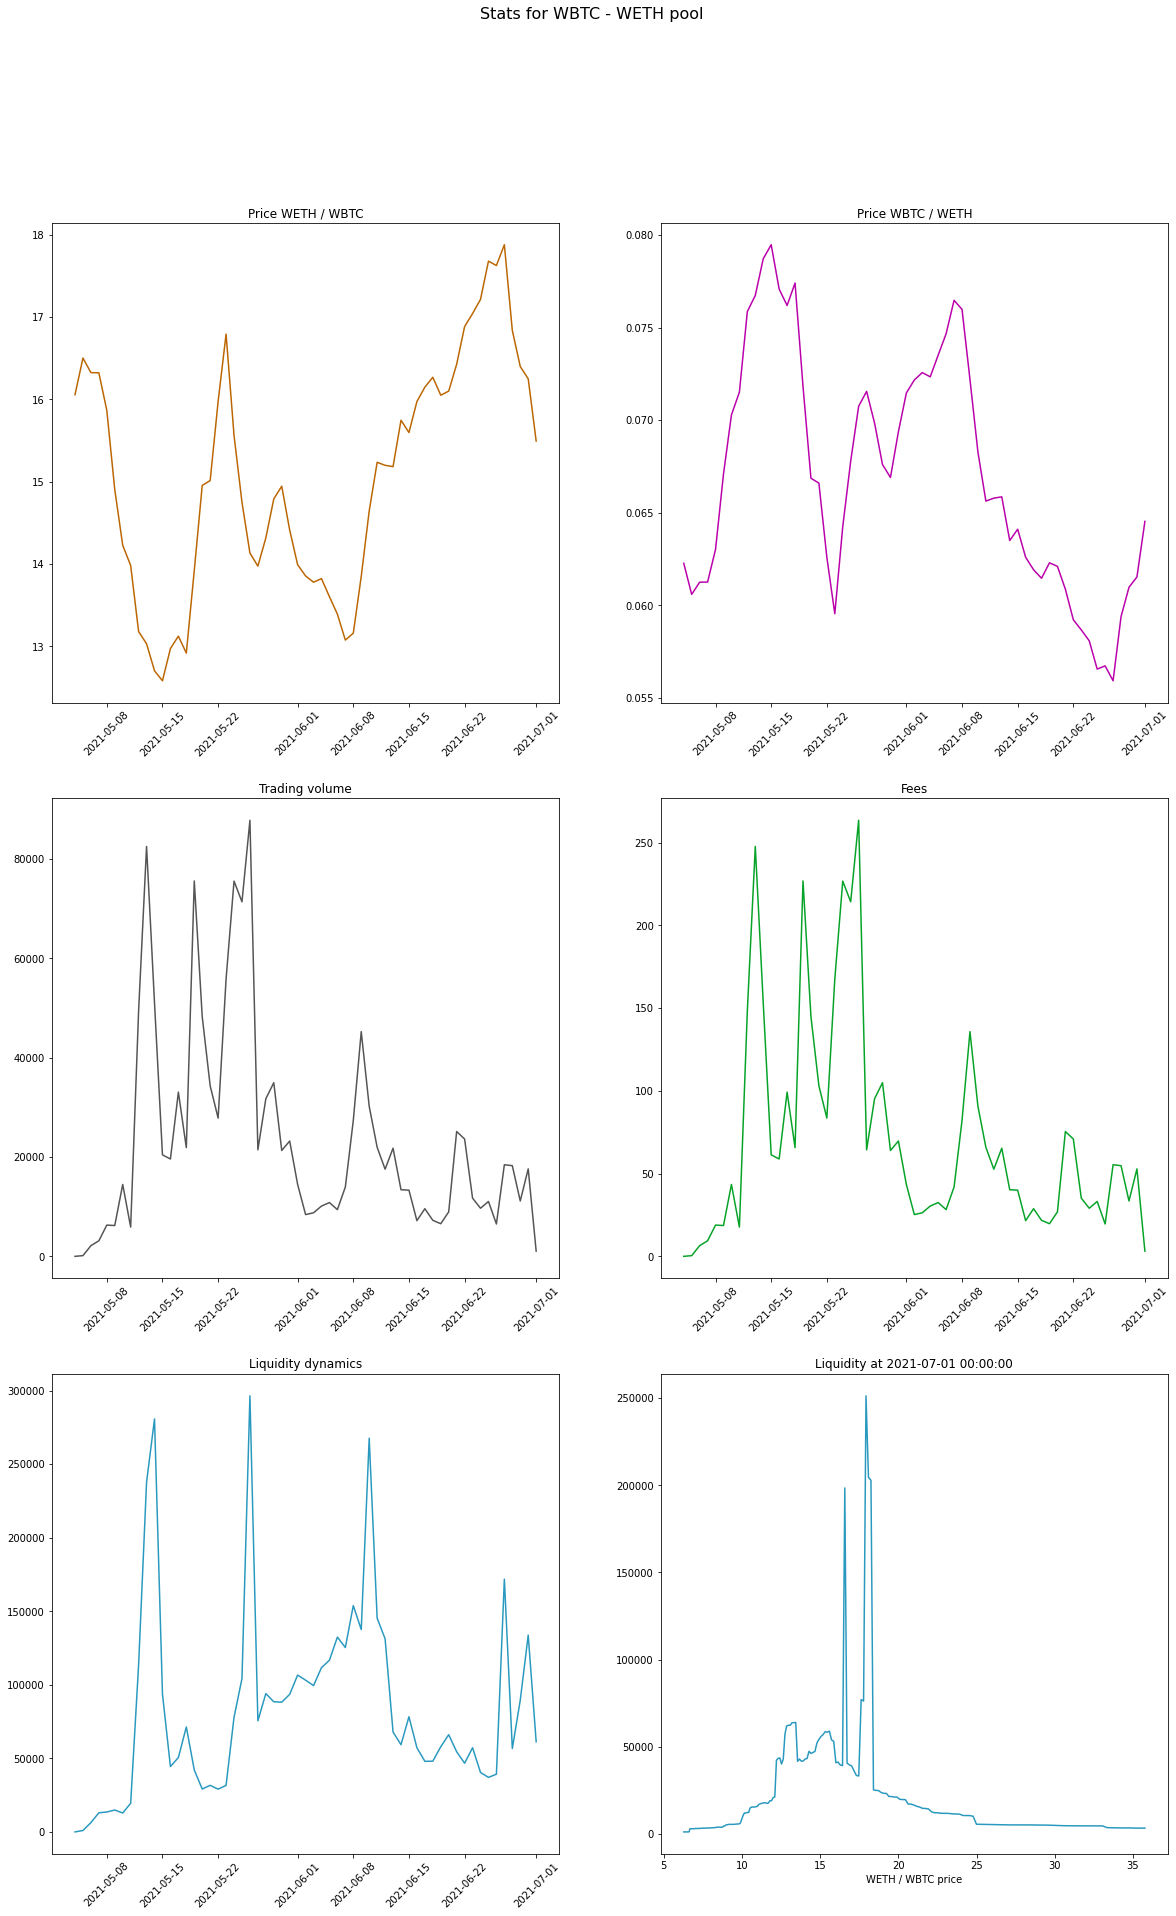

In [2]:
from strategy import PoolData, Pool, Token, Fee, Frequency
pool = Pool(Token.WBTC, Token.WETH, Fee.MIDDLE)
data = PoolData.from_pool(pool, Frequency.DAY)
data.plot()

### Define strategy

In [3]:
from strategy import Position, AbstractStrategy 
from datetime import datetime
from typing import Callable

class ConstantStrategy(AbstractStrategy):        
    def rebalance(
        self,
        t: datetime,
        c: float,
        vol: float,
        l: Callable[[float], float],
        pool_data: PoolData,
    ) -> bool:
        if not self.portfolio.position("main"):
            self.portfolio.add_position(Position(id="main", a = c / 2, b = c * 2))
            pos = self.portfolio.position("main")
            pos.deposit(c, 1 / 2 / c, 1 / 2, pool_data.pool.fee.percent)

        return False

### Backtest

16.035533216311816 16.035533216311816 0.1719944184273271 2.7484591536994554 0.1719944184273271 2.7484591536994554 0 0.0 0.003
16.035533216311816 16.058671701224867 0.1719944184273271 2.7484591536994554 0.17157194095601638 2.755238691206177 1.2674324139321514e-06 0 0.003
16.058671701224867 16.08165650996577 0.17157194095601638 2.755238691206177 0.17115317246265283 2.7619683678959226 1.2563054800906748e-06 0 0.003
16.08165650996577 16.500909807899333 0.17114615010620515 2.7618550452732826 0.16366214442004606 2.883769007151329 2.245201705847727e-05 0 0.003
16.500909807899333 16.71472018034502 0.16366214442004606 2.883769007151329 0.15995433943115184 2.945346270659262 1.1123414966682676e-05 0 0.003
16.71472018034502 16.71987048643553 0.15995433943115184 2.945346270659262 0.15986590331950754 2.946824683238216 2.653083349329066e-07 0 0.003
16.71987048643553 16.77010561461161 0.15986590331950754 2.946824683238216 0.15900545165877925 2.961232919805765 2.581354982184869e-06 0 0.003
16.770105614

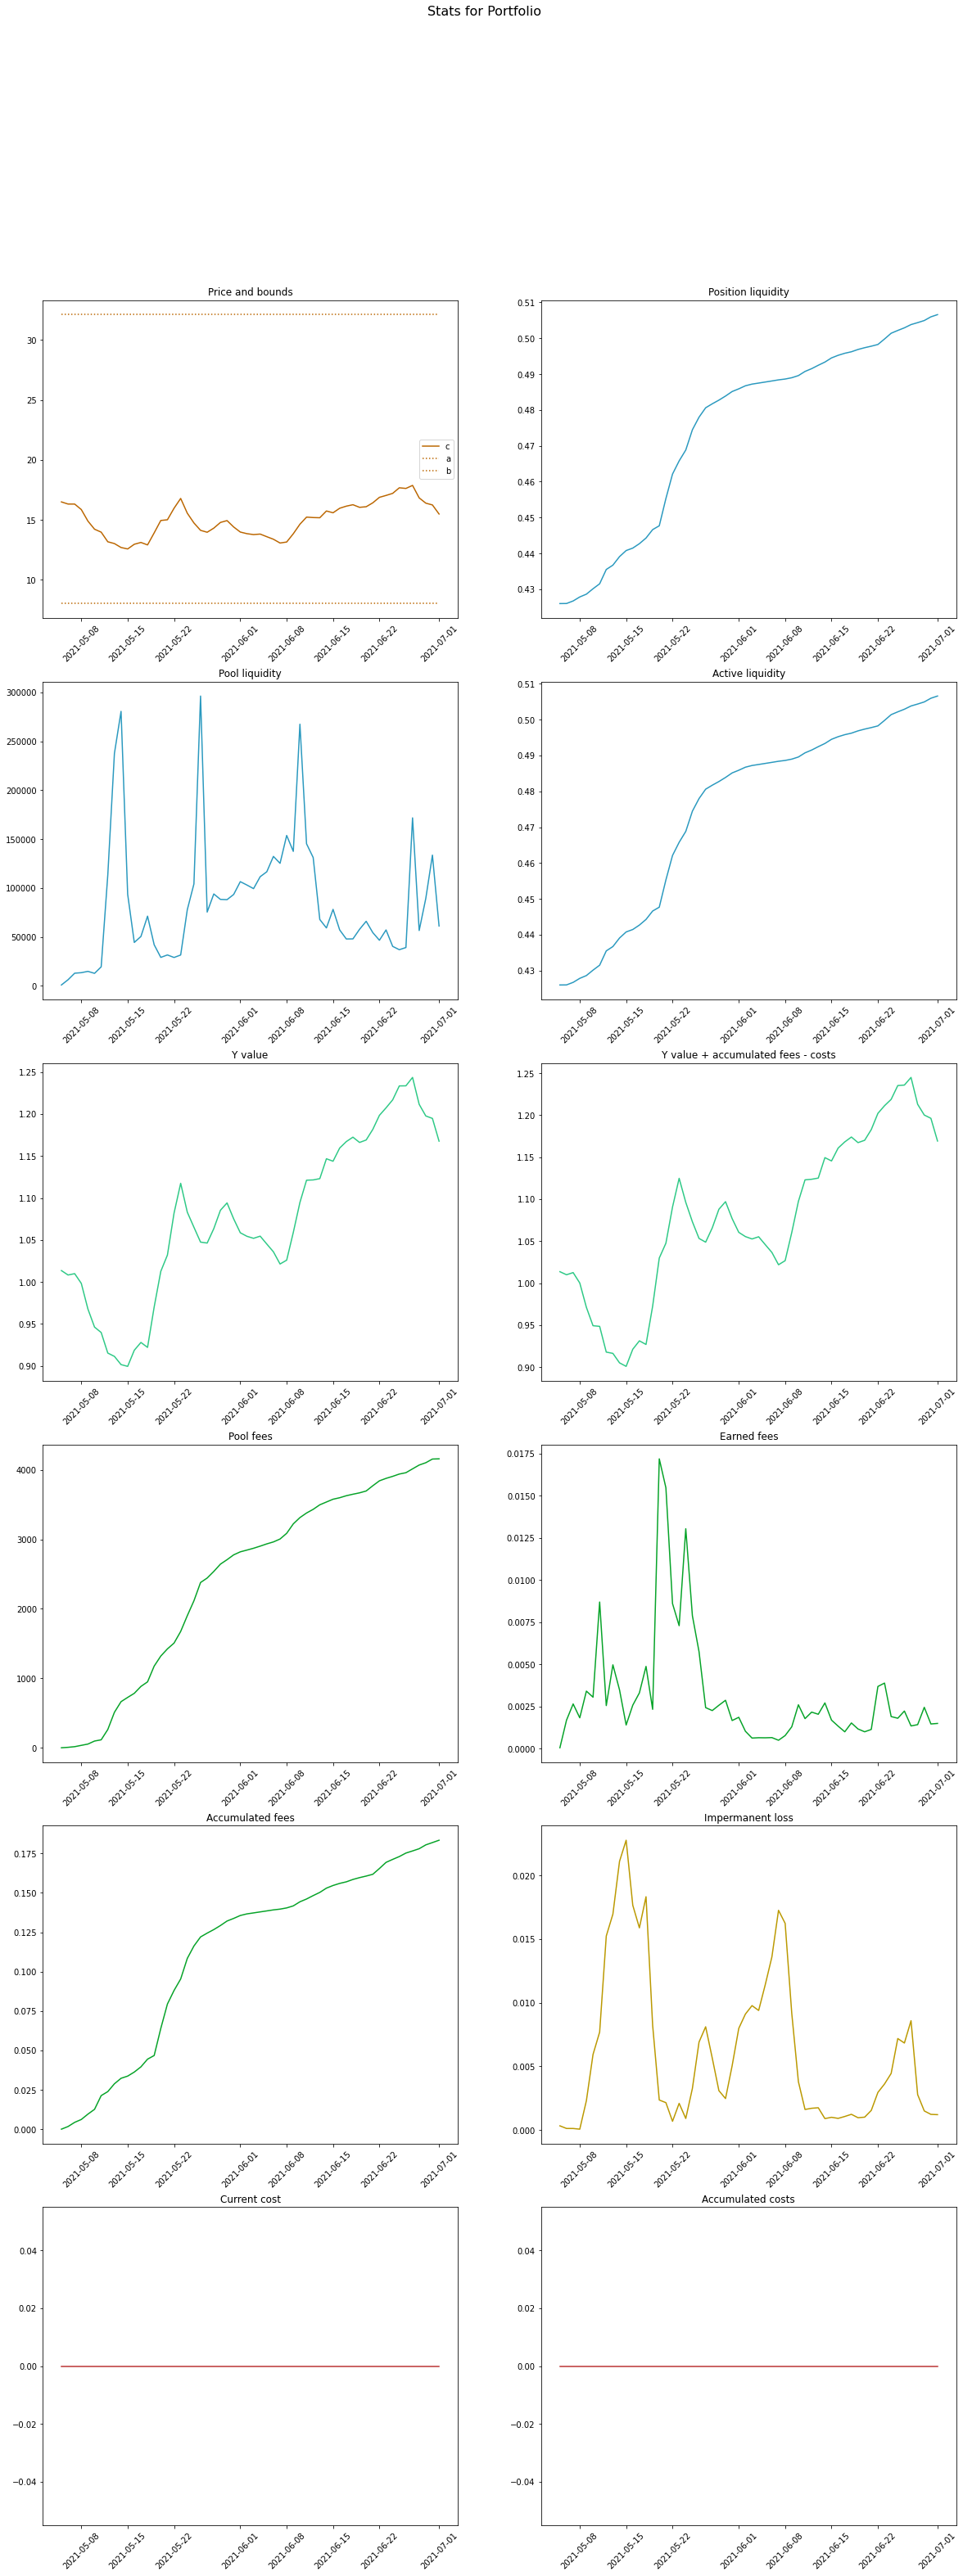

In [4]:
from strategy import Backtest, Position

backtest = Backtest(ConstantStrategy)
backtest.run(data, 0.001)
backtest.plot()

In [5]:
from strategy import Portfolio

p = Portfolio()
pos = Position(id="main", a = 16 / 2, b = 16 * 2)
p.add_position(pos)
pos.deposit(16, 1 / 2 / 16, 1 / 2, 0.003)
# pos.rebalance(16 / 3, 16 * 3, 16, 0.003)
# backtest.history
ff0, ff1 = 0, 0
for b, a in data.swap_prices("2021-05-21", "2021-05-22"):
    f0, f1 = pos.charge_fees(b, a, 0.003)
    print(f0, f1)
    ff0 += f0
    ff1 += f1
print(ff0, ff1)

14.68989879656826 14.672082646198051 0.19713641704160018 2.35325232891644 0.1975074822458642 2.3478047250984546 0 1.6342811453956773e-05 0.003
0 1.6342811453956773e-05
14.672082646198051 14.654498877081968 0.1975074822458642 2.3478047250984546 0.19787437083847645 2.3424249319548753 0 1.6139379430737845e-05 0.003
0 1.6139379430737845e-05
14.654498877081968 14.62310678062288 0.19787437083847645 2.3424249319548753 0.19853101728509684 2.3328124196200997 0 2.8837537004327008e-05 0.003
0 2.8837537004327008e-05
14.62310678062288 14.600100524884994 0.19853101728509684 2.3328124196200997 0.19901359648010034 2.3257611658767505 0 2.115376123004742e-05 0.003
0 2.115376123004742e-05
14.600100524884994 14.586234276422815 0.19901359648010034 2.3257611658767505 0.19930500617802532 2.3215085758526914 0 1.2757770072177266e-05 0.003
0 1.2757770072177266e-05
14.586234276422815 14.574774843427369 0.19930500617802532 2.3215085758526914 0.19954614861751252 2.317992597685637 0 1.054793450116387e-05 0.003
0 1.